# 資料準備

In [0]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)

In [0]:
from keras.datasets import mnist

In [0]:
(x_train_image, y_train_label), \
(x_test_image, y_test_label) = mnist.load_data()

In [33]:
print('train data=',len(x_train_image))
print(' test data=',len(x_test_image))

train data= 60000
 test data= 10000


In [11]:
print ('x_train_image:',x_train_image.shape)
print ('y_train_label:',y_train_label.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [0]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()

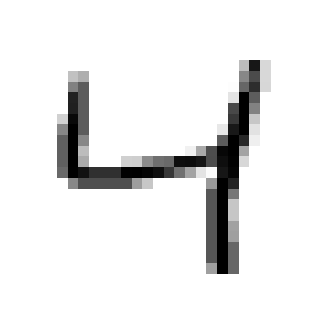

In [49]:
    plt.imshow(x_train_image[2], cmap='binary')
    plt.grid('false')
    plt.axis('off')
    plt.show()

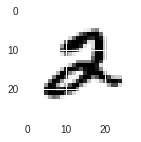

In [39]:
plot_image(x_train_image[5])

In [40]:
y_train_label[5]

2

In [0]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=20):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(1,10, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

In [0]:
x_train_image[6] = x_train_image[15]
x_train_image[8]=x_train_image[13]
x_train_image[9]= x_train_image[17]



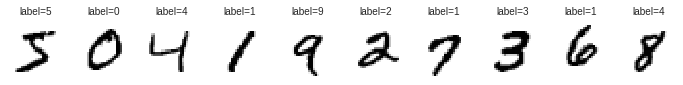

In [88]:
plot_images_labels_prediction(x_train_image,y_train_label,[],0,10)


In [35]:
y_train_label

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [17]:
print ('x_test_image:',x_test_image.shape)
print ('y_test_label:',y_test_label.shape)

x_test_image: (10000, 28, 28)
y_test_label: (10000,)


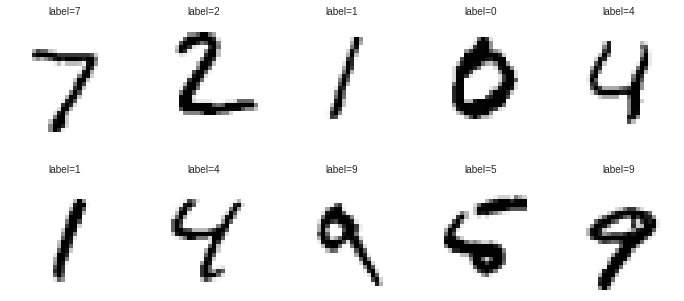

In [18]:
plot_images_labels_prediction(x_test_image,y_test_label,[],0,10)

# 將images進行預處理

In [19]:
print ('x_train_image:',x_train_image.shape)
print ('y_train_label:',y_train_label.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [0]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [21]:
print ('x_train:',x_Train.shape)
print ('x_test:',x_Test.shape)

x_train: (60000, 784)
x_test: (10000, 784)


In [22]:
x_train_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [0]:
x_Train_normalize = x_Train/ 255
x_Test_normalize = x_Test/ 255

In [24]:
x_Train_normalize[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# one hot encode outputs

In [25]:
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [0]:
y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)

In [27]:
y_TrainOneHot[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)